In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [167]:
dataset = pd.read_csv(r"C:\Users\karan\OneDrive\Desktop\DS_datasets\credit_risk_dataset.csv")
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [168]:
print("Number of rows in Dataset :",dataset.shape[0])
print("Number of columns in Dataset :",dataset.shape[1])
print("Name of columns on Dataset :")
dataset.columns

Number of rows in Dataset : 32581
Number of columns in Dataset : 12
Name of columns on Dataset :


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [169]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [170]:
dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [171]:
dataset.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [172]:
dataset['person_emp_length'].fillna(dataset['person_emp_length'].median(), inplace=True)
dataset["loan_int_rate"].fillna(dataset["loan_int_rate"].median(),inplace=True)
print("Missing value fill are done")

Missing value fill are done


In [173]:
dataset.isnull().sum().sum()

np.int64(0)

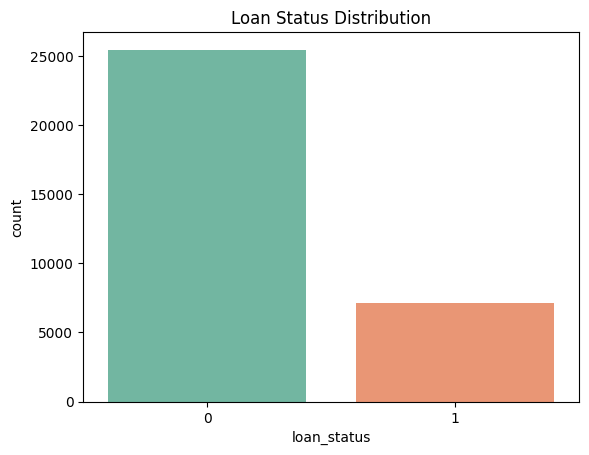

In [174]:
sns.countplot(x='loan_status', data=dataset,palette='Set2')
plt.title("Loan Status Distribution")
plt.show()

Text(0, 0.5, 'Frequency')

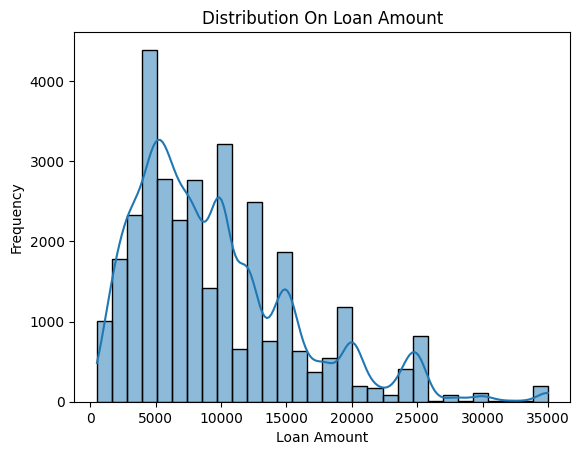

In [198]:
sns.histplot(dataset["loan_amnt"], bins=30, kde=True)
plt.title("Distribution On Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

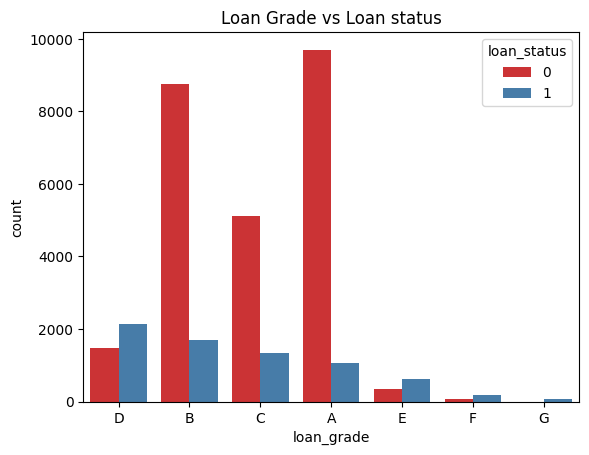

In [199]:
sns.countplot(x="loan_grade",hue="loan_status",data=dataset ,palette="Set1")
plt.title("Loan Grade vs Loan status")
plt.show()

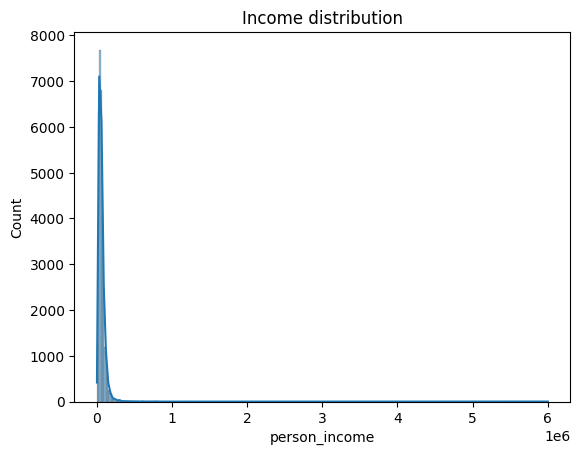

In [200]:
sns.histplot(dataset["person_income"],kde=True)
plt.title("Income distribution")
plt.show()

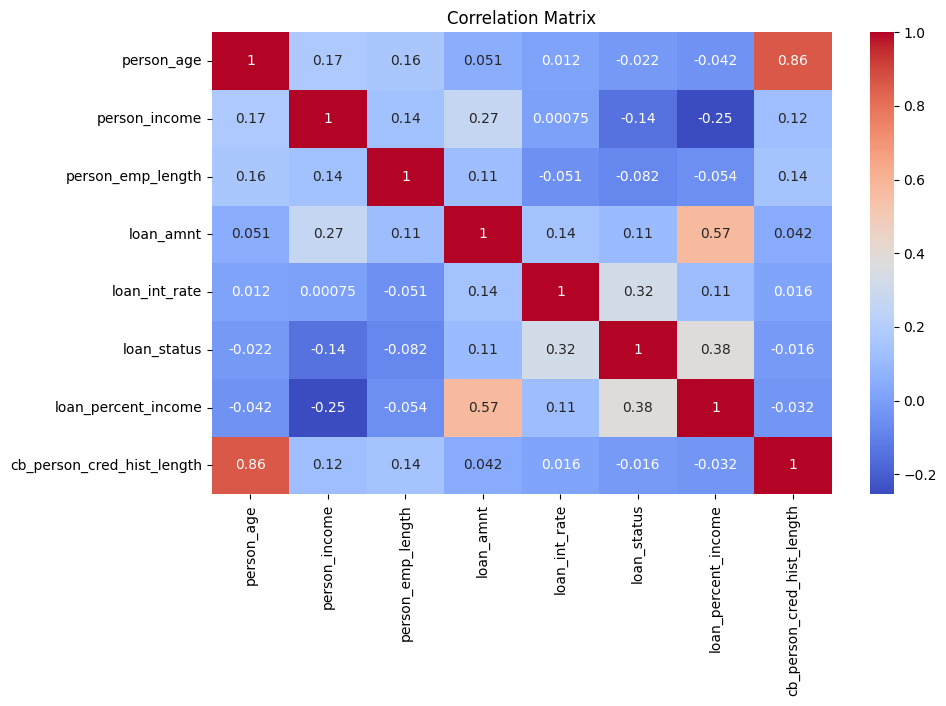

In [201]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


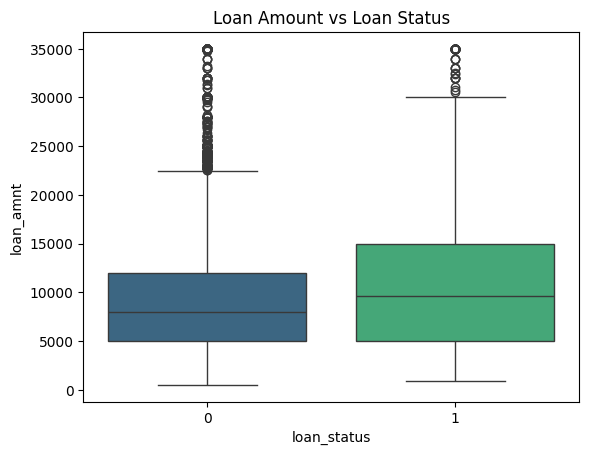

In [202]:
sns.boxplot(x='loan_status', y='loan_amnt', data=dataset, palette='viridis')
plt.title("Loan Amount vs Loan Status")
plt.show()


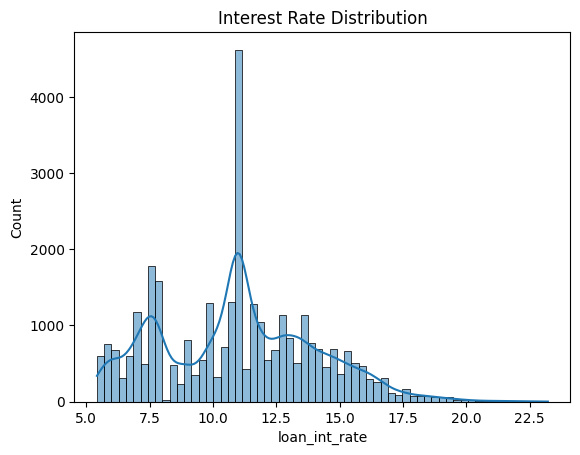

In [203]:
sns.histplot(dataset['loan_int_rate'], kde=True )
plt.title("Interest Rate Distribution")
plt.show()


In [204]:
#Removing an unrealistic Outlier
df = dataset[dataset['person_emp_length'] <= 60]

In [205]:
Q1 = dataset["person_income"].quantile(0.25)
Q3 = dataset["person_income"].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#Detect outliers
outliers = dataset[
    (dataset["person_income"] < lower) |
    (dataset["person_income"] > upper)
]

print("Number of outliers:", outliers.shape[0])


Number of outliers: 1484


In [206]:
dataset_clean = dataset[(dataset["person_income"] >= lower) &
                        (dataset["person_income"] <= upper)]

print("New shape after removing outliers:", dataset_clean.shape)


New shape after removing outliers: (31097, 12)


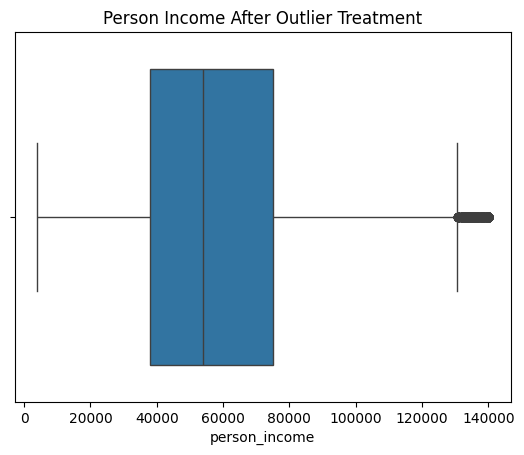

In [207]:
sns.boxplot(x=dataset_clean["person_income"])
plt.title("Person Income After Outlier Treatment")
plt.show()

In [208]:
#Encoding for ordered column
le = LabelEncoder()
dataset["loan_grade"]=le.fit_transform(dataset['loan_grade'])
print("Encoding are done :",dataset["loan_grade"].head())

Encoding are done : 0    3
1    1
2    2
3    2
4    2
Name: loan_grade, dtype: int64


In [209]:
#Encoding for unordred column
dataset = pd.get_dummies(
    dataset,
    columns=[
        "person_home_ownership",
        "loan_intent",
        "cb_person_default_on_file"
    ],
    drop_first=True
)


In [210]:
X =dataset.drop("loan_status",axis=1)
y =dataset["loan_status"]

In [211]:
#Scaling of numerical column
num_cols = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]

scaler = StandardScaler()
dataset[num_cols] = scaler.fit_transform(dataset[num_cols])


In [212]:
X_train ,X_test ,y_train ,y_test = train_test_split(
    X,y ,random_state=42 ,test_size =0.2 ,stratify=y                        #stratify are keeps class balance
)
print("Training data Done")

Training data Done


In [213]:
model =LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [214]:
# Hyperparameter tuning to improve model performance
rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    {
        'n_estimators': [100, 200],
        'max_depth': [10, 20]
    }
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Train score:", best_model.score(X_train, y_train))
print("Test score:", best_model.score(X_test, y_test))

Train score: 0.9816605279312461
Test score: 0.9350928341261316


In [215]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # probability of default

In [216]:
from sklearn.metrics import classification_report, roc_auc_score 

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5095
           1       0.75      0.43      0.55      1422

    accuracy                           0.85      6517
   macro avg       0.81      0.70      0.73      6517
weighted avg       0.84      0.85      0.83      6517

ROC-AUC: 0.8445911644989917


Text(50.722222222222214, 0.5, 'Actual Value')

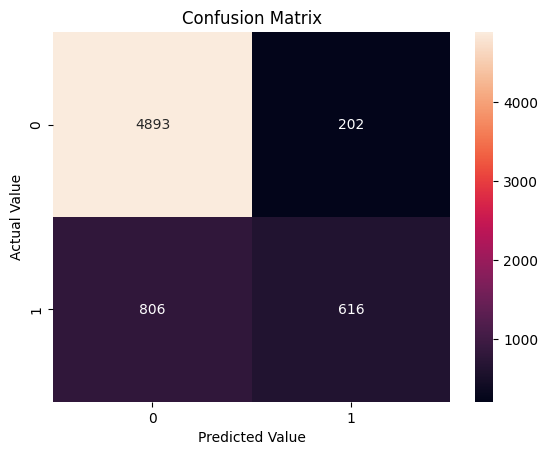

In [217]:
sns.heatmap(confusion_matrix(y_test ,y_pred),annot=True ,fmt="d" )
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [218]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [219]:
y_pred_custom = (y_prob > 0.35).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5095
           1       0.62      0.62      0.62      1422

    accuracy                           0.83      6517
   macro avg       0.76      0.76      0.76      6517
weighted avg       0.83      0.83      0.83      6517



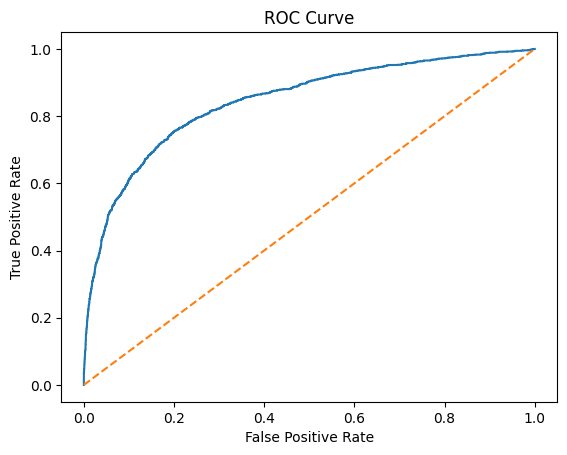

In [220]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


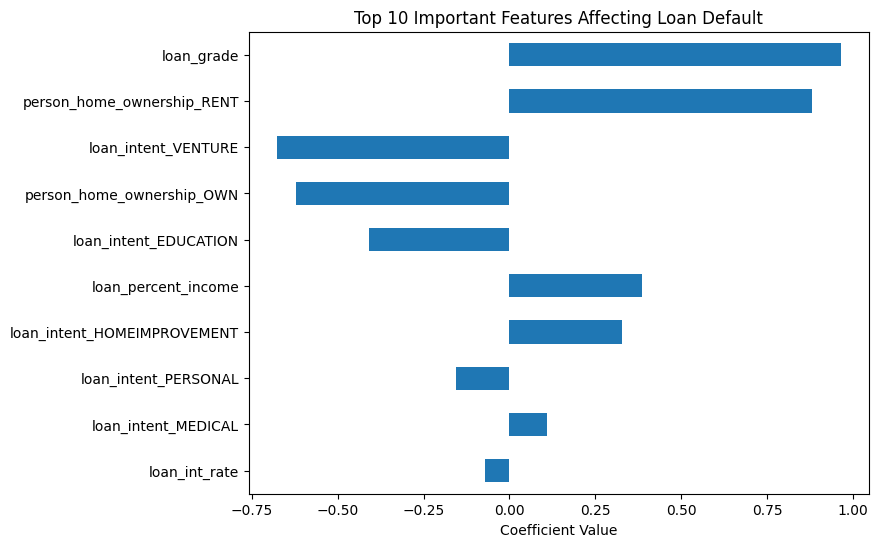

In [221]:
feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind="barh")
plt.xlabel("Coefficient Value")
plt.title("Top 10 Important Features Affecting Loan Default")
plt.gca().invert_yaxis()
plt.show()


Business Insight =
After analyzing the data, I found that customers who have lower income and less work experience are more likely to default on loans. Loan grade and interest rate also matter a lot — people with lower loan grades and higher interest rates show a higher chance of not repaying the loan. I also noticed that some regions have higher default rates, which means location should be considered while giving loans.

To check how well the model performs, I evaluated it using train and test scores. The model achieved a training score of 0.7669 and a test score of 0.7698, which shows that it performs consistently on both training and unseen data. This means the model is not overfitting and is generalizing well.

Based on these insights, banks can take smarter decisions. They can apply stricter checks for high-risk customers, adjust interest rates based on risk level, and approve loans more carefully. This can help reduce loan defaults while still maintaining profit.

In [222]:
print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))


Train score: 0.7669582565991406
Test score: 0.7698327451281264


Train vs Test Performance
The training accuracy is 76.7% and the test accuracy is 77.0%.  
The minimal difference between these scores indicates that the model generalizes well and does not suffer from overfitting or underfitting.
